# <span style="color:green"> Data Findings -British Airline Reviews 
    dataset from Skytrax
### By Carolyne Kemunto Machuka 

## Data set
This data set contains 800 British Airline Reviews.

### Key take Insights

- Overall sentiment analysis shows that 431 reviews (majority) are negative, indicating dissatisfaction, while 357 reviews are positive, suggesting a significant number of happy customers. Only 12 reviews are neutral, meaning most customers have strong opinions about their experience.

- Word cloud highlights key terms from airline reviews, with words like "flight," "BA," "seat," and "service" appearing most frequently, indicating common discussion points.

- Review Trends Over Time: Customer review activity peaked during specific travel seasons (March-April 2022, May-June 2023, and July-August 2024), suggesting seasonal variations or airline performance influences.

- Sentiment vs. Ratings: Higher ratings correlate with positive sentiment, while lower ratings show negative sentiment, though some mismatches exist, highlighting potential anomalies in customer feedback.




In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import fractions
import sklearn

# Define the  British airline review URL 
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}/"

# Number of pages to scrape (Adjust as needed)
num_pages = 80

# List to store scraped data
reviews_list = []

# Loop through multiple pages
for page in range(1, num_pages + 1):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    
    
    # Send request and parse HTML
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    # Find all review containers
    reviews = soup.find_all("article", class_=["comp", "comp_reviews-review"])
    
    
    for review in reviews:
        try:
        # Find the rating and best rating inside the review
            rating_tag = review.find("span", itemprop="ratingValue")
            best_rating_tag = review.find("span", itemprop="bestRating")
        
        # Extract and clean text
            rating = rating_tag.text.strip() if rating_tag else "No Rating"
            best_rating = best_rating_tag.text.strip() if best_rating_tag else "No Best Rating"
        
        # Combine both into a single string output
            ratings = f"{rating}/{best_rating}"
        
        except AttributeError:
            ratings = "No Rating/No Best Rating"  # Handle missing values
    

        try:
            title = review.find("h2").text.strip()
        except AttributeError:
            title = "No Title"
        
        try:
            content = review.find("div", class_="text_content").text.strip()
        except AttributeError:
            content = "No Review"

        try:
            date = review.find("time").text.strip()
        except AttributeError:
            date = "No Date"
        
        # Append data
        reviews_list.append([date, ratings, title, content])
    
    # Sleep to avoid being blocked
    time.sleep(2)

# Convert to DataFrame
df = pd.DataFrame(reviews_list, columns=["Date", "ratings", "Title", "Review"])

# Save to CSV
df.to_csv("data/skytrax_reviews.csv", index=False)
print("Scraping completed! Data saved to 'data/skytrax_reviews.csv'.")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

In [5]:
# Load the CSV file
df = pd.read_csv("data/skytrax_reviews.csv")

# Display the last 10 rows
print (df.tail(10))

                Date                   ratings  \
950  1st August 2020                     10/10   
951   31st July 2020                      2/10   
952   23rd July 2020                      1/10   
953   23rd July 2020                      1/10   
954   11th June 2020                      1/10   
955    8th June 2020                      8/10   
956    6th June 2020                      1/10   
957    4th June 2020                      2/10   
958    29th May 2020                      1/10   
959          No Date  No Rating/No Best Rating   

                                      Title  \
950            "I was pleasantly surprised"   
951    "have to call to redeem the voucher"   
952               "Service is non-existent"   
953              "BA has failed completely"   
954  "This is appalling business practice!"   
955         "efficient, clean and punctual"   
956                        " Total rip off"   
957              "totally ripped off by BA"   
958     "tickets should ha

In [3]:
# Preliminary Assessment of Data
print(df.info())   # Check column types and missing values
print(df.shape)    # Check number of rows and columns
print(df.duplicated().sum()) # Count duplicate rows
print(df.isnull().sum()) # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     960 non-null    object
 1   ratings  960 non-null    object
 2   Title    960 non-null    object
 3   Review   960 non-null    object
dtypes: object(4)
memory usage: 30.1+ KB
None
(960, 4)
159
Date       0
ratings    0
Title      0
Review     0
dtype: int64


In [4]:
print(df["ratings"].value_counts())

1/10                        358
2/10                        100
3/10                         80
No Rating/No Best Rating     80
8/10                         62
9/10                         60
10/10                        60
4/10                         54
5/10                         40
7/10                         37
6/10                         29
Name: ratings, dtype: int64



# Data assessment: Quality and Tidiness

- Duplicate data
- Nulls in ratings columns
- Nulls in date column
- Convertion of date to datetime data type
- Convertion of ratings to a float data type

# Cleaning data


In [6]:
# Making a copy of the original data
clean_df= df.copy()
clean_df.tail()

,Date,ratings,Title,Review
955,8th June 2020,8/10,"""efficient, clean and punctual""",✅ Trip Verified | A short hop from London to ...
956,6th June 2020,1/10,""" Total rip off""",✅ Trip Verified | Total rip off. British Airw...
957,4th June 2020,2/10,"""totally ripped off by BA""",Not Verified | I booked flights to Rome from ...
958,29th May 2020,1/10,"""tickets should have been refunded""",✅ Trip Verified | I booked a trip to Spain fo...
959,No Date,No Rating/No Best Rating,No Title,No Review


In [7]:
clean_df.drop_duplicates(inplace=True,ignore_index=True) #drop duplicates
print(clean_df.duplicated().sum()) # Count duplicate rows
                        

0


In [7]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     801 non-null    object
 1   ratings  801 non-null    object
 2   Title    801 non-null    object
 3   Review   801 non-null    object
dtypes: object(4)
memory usage: 25.2+ KB


In [8]:
print(clean_df["ratings"].value_counts())

1/10                        324
2/10                         90
3/10                         73
8/10                         59
9/10                         55
10/10                        54
4/10                         50
5/10                         35
7/10                         31
6/10                         29
No Rating/No Best Rating      1
Name: ratings, dtype: int64


In [9]:
# Replace "No Rating" with NaN
clean_df["ratings"] = clean_df["ratings"].replace("No Rating/No Best Rating", pd.NA)



# Drop rows where 'ratings' is NaN (in-place)
clean_df.dropna(subset=["ratings"], inplace=True)

# Convert "9/10" format to float
clean_df["ratings"] = clean_df["ratings"].apply(lambda x: float(x.split("/")[0]) / 10 if pd.notna(x) else x)


clean_df.tail()

,Date,ratings,Title,Review
796,11th June 2020,0.1,"""This is appalling business practice!""",✅ Trip Verified | BA cancelled my flight to Ly...
797,8th June 2020,0.8,"""efficient, clean and punctual""",✅ Trip Verified | A short hop from London to ...
798,6th June 2020,0.1,""" Total rip off""",✅ Trip Verified | Total rip off. British Airw...
799,4th June 2020,0.2,"""totally ripped off by BA""",Not Verified | I booked flights to Rome from ...
800,29th May 2020,0.1,"""tickets should have been refunded""",✅ Trip Verified | I booked a trip to Spain fo...


In [10]:
clean_df = clean_df[clean_df["ratings"] != "No Rating/No Best Rating "]
print(clean_df["ratings"].unique())

[0.7 0.1 0.3 0.9 0.5 0.4 0.2 0.8 1.  0.6]


In [11]:
print(clean_df.shape)

(800, 4)


In [12]:
invalid_indices =clean_df[clean_df["Date"] == "No Date"].index
print(invalid_indices)

Int64Index([], dtype='int64')


In [10]:
# Convert to datetime format
clean_df["Date"] = pd.to_datetime(clean_df["Date"])

# Check data type
print(clean_df.dtypes)

Date       datetime64[ns]
ratings           float64
Title              object
Review             object
dtype: object


In [11]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9.,!? ]+', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and newlines
    return text

df['Review'] = df['Review'].apply(clean_text)
clean_df.head()

,Date,ratings,Title,Review
0,2025-03-19,0.7,"""disagreeable flight attendant""",✅ Trip Verified | Flight mainly let down by ...
1,2025-03-16,0.1,"""flight was delayed nearly 1 hour""",✅ Trip Verified | Another awful experience b...
2,2025-03-16,0.3,"""full of attitude to me""","✅ Trip Verified | The service was rude, full..."
3,2025-03-16,0.1,"""service was outrageous""",✅ Trip Verified | This flight was a joke. Th...
4,2025-03-07,0.9,"""managed to get everything right""",✅ Trip Verified | This time British Airways ...


In [12]:
df['Review'] = df['Review'].str.lower() # Convert text to lower case
clean_df.head()

,Date,ratings,Title,Review
0,2025-03-19,0.7,"""disagreeable flight attendant""",✅ Trip Verified | Flight mainly let down by ...
1,2025-03-16,0.1,"""flight was delayed nearly 1 hour""",✅ Trip Verified | Another awful experience b...
2,2025-03-16,0.3,"""full of attitude to me""","✅ Trip Verified | The service was rude, full..."
3,2025-03-16,0.1,"""service was outrageous""",✅ Trip Verified | This flight was a joke. Th...
4,2025-03-07,0.9,"""managed to get everything right""",✅ Trip Verified | This time British Airways ...


In [13]:
df['Review'] = df['Review'].replace({"n't": " not", "'re": " are", "'ve": " have"}, regex=True)


## Storing Data

In [14]:
clean_df.to_csv('tidy_AirlineReviews1.csv', index=False)

## Data analysis and visualization

In [15]:
#Importing dataframe for analysis
import pandas as pd
tidy_df=pd.read_csv('tidy_AirlineReviews1.csv')
tidy_df.tail()

,Date,ratings,Title,Review
795,2020-06-11,0.1,"""This is appalling business practice!""",✅ Trip Verified | BA cancelled my flight to Ly...
796,2020-06-08,0.8,"""efficient, clean and punctual""",✅ Trip Verified | A short hop from London to ...
797,2020-06-06,0.1,""" Total rip off""",✅ Trip Verified | Total rip off. British Airw...
798,2020-06-04,0.2,"""totally ripped off by BA""",Not Verified | I booked flights to Rome from ...
799,2020-05-29,0.1,"""tickets should have been refunded""",✅ Trip Verified | I booked a trip to Spain fo...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\25472\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Negative    431
Positive    357
Neutral      12
Name: Sentiment_Label, dtype: int64
                                              Review  Sentiment  \
0  ✅ Trip Verified |   Flight mainly let down by ...    -0.8845   
1  ✅ Trip Verified |   Another awful experience b...    -0.8294   
2  ✅ Trip Verified |   The service was rude, full...    -0.4588   
3  ✅ Trip Verified |   This flight was a joke. Th...     0.0000   
4  ✅ Trip Verified |   This time British Airways ...     0.9831   

  Sentiment_Label  
0        Negative  
1        Negative  
2        Negative  
3         Neutral  
4        Positive  


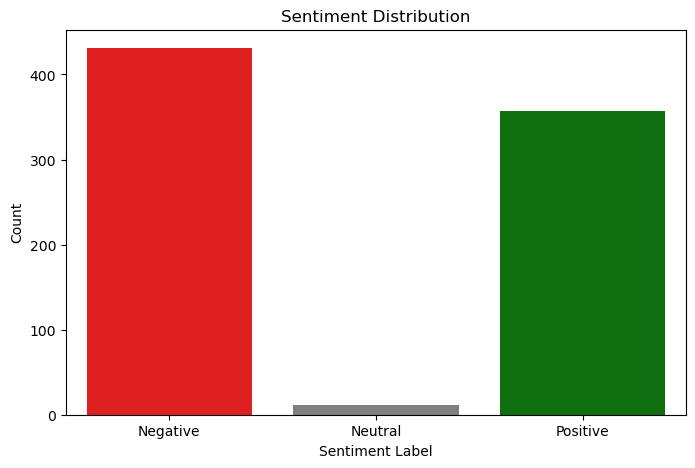

In [23]:
#Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER 
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyzing Review Column
tidy_df["Sentiment"] = tidy_df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify reviews as Positive, Negative, or Neutral
tidy_df["Sentiment_Label"] = tidy_df["Sentiment"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Count sentiment distribution
print(tidy_df["Sentiment_Label"].value_counts())

# Display the first few rows
print(tidy_df[["Review", "Sentiment", "Sentiment_Label"]].head())

# Set figure size
plt.figure(figsize=(8,5))

# Create a bar plot
sns.countplot(x="Sentiment_Label", data=tidy_df, palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})

# Add title and labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")

# Show plot
plt.show()







The sentiment analysis shows that 431 reviews (majority) are negative, indicating dissatisfaction, while 357 reviews are positive, suggesting a significant number of happy customers. Only 12 reviews are neutral, meaning most customers have strong opinions about their experience.

In [28]:
#Topic Modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words="english")
doc_term_matrix = vectorizer.fit_transform(tidy_df["Review"])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components based on topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components based on topics
lda.fit(doc_term_matrix)

# Get words per topic
words = vectorizer.get_feature_names_out()

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"\nTOP WORDS FOR TOPIC #{index + 1}")
    print([words[i] for i in topic.argsort()[-10:]])  # Top 10 words per topic



TOP WORDS FOR TOPIC #1
['staff', 'british', 'time', 'check', 'hours', 'service', 'trip', 'verified', 'ba', 'flight']

TOP WORDS FOR TOPIC #2
['time', 'good', 'seat', 'food', 'class', 'crew', 'trip', 'verified', 'flight', 'ba']

TOP WORDS FOR TOPIC #3
['food', 'london', 'airways', 'british', 'service', 'staff', 'ba', 'trip', 'verified', 'flight']

TOP WORDS FOR TOPIC #4
['airline', 'customer', 'told', 'hours', 'trip', 'airways', 'verified', 'british', 'ba', 'flight']

TOP WORDS FOR TOPIC #5
['ba', 'time', 'trip', 'verified', 'food', 'service', 'cabin', 'crew', 'good', 'flight']


Topic 1: Focuses on the in-flight experience, including seating, food, and crew service, indicating passenger comfort and satisfaction.

Topic 2: Highlights ground staff, luggage handling, and overall airline service, pointing to operational efficiency and customer interactions.

Topic 3: Centers on flight cancellations and service disruptions, suggesting customer frustrations with delays and communication.

Topic 4: Emphasizes luggage handling, customer service, and check-in experiences, indicating potential pain points in baggage management.

Topic 5: Relates to airport lounges, check-in times, and British Airways (LHR), suggesting discussions around premium services and efficiency.

This analysis provides insights into key customer concerns and satisfaction areas.

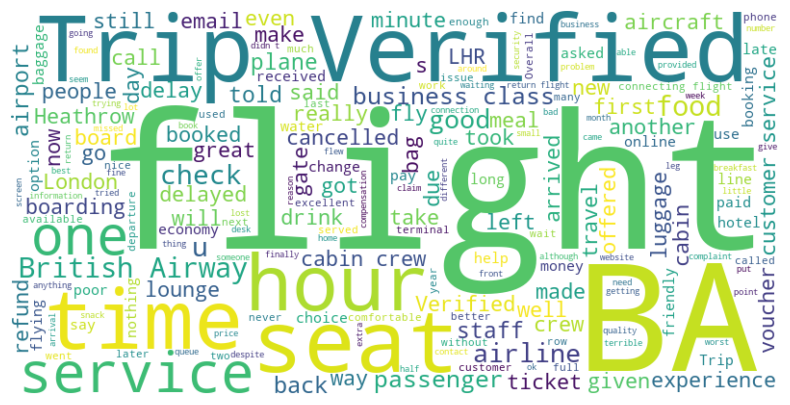

In [29]:
#Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into one string
text = " ".join(tidy_df["Review"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


The word cloud highlights key terms from airline reviews, with words like "flight," "BA," "seat," and "service" appearing most frequently, indicating common discussion points. The prominence of words such as "delayed," "check," and "luggage" suggests a mix of both positive and negative experiences.

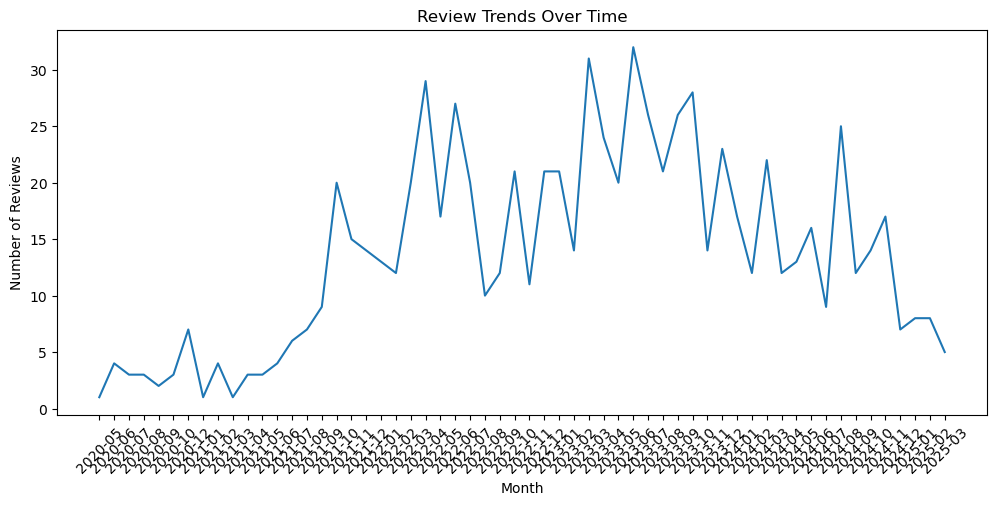

In [30]:
# Convert 'Date' column to datetime if not already
tidy_df["Date"] = pd.to_datetime(tidy_df["Date"])

# Group reviews by month/year and count them
tidy_df_trend = tidy_df.groupby(tidy_df["Date"].dt.to_period("M")).size()

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=tidy_df_trend.index.astype(str), y=tidy_df_trend.values)
plt.xticks(rotation=45)
plt.title("Review Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

The line chart shows the trend of customer reviews over time, with a noticeable increase in review activity leading to peak periods, followed by fluctuations and a gradual decline. This suggests that customer engagement was high during March-April in 2022, May-June 2023 and July-August 2024 possibly due to travel seasons, airline performance, or external factors affecting review frequency.

In [34]:
from textblob import TextBlob

# Apply TextBlob sentiment analysis
tidy_df["TextBlob_Sentiment"] = tidy_df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify as Positive, Negative, or Neutral
tidy_df["TextBlob_Label"] =tidy_df["TextBlob_Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Compare VADER & TextBlob
print(tidy_df[["Review", "Sentiment_Label", "TextBlob_Label"]].head())


                                              Review Sentiment_Label  \
0  ✅ Trip Verified |   Flight mainly let down by ...        Negative   
1  ✅ Trip Verified |   Another awful experience b...        Negative   
2  ✅ Trip Verified |   The service was rude, full...        Negative   
3  ✅ Trip Verified |   This flight was a joke. Th...         Neutral   
4  ✅ Trip Verified |   This time British Airways ...        Positive   

  TextBlob_Label  
0       Positive  
1       Negative  
2       Negative  
3       Negative  
4       Positive  


In [35]:
tidy_df["Combined_Sentiment"] = (tidy_df["Sentiment"] + tidy_df["TextBlob_Sentiment"]) / 2

# Classify based on combined sentiment
tidy_df["Final_Sentiment_Label"] = tidy_df["Combined_Sentiment"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

# Show updated results
print(tidy_df[["Review", "Sentiment_Label", "TextBlob_Label", "Final_Sentiment_Label"]].tail())

                                                Review Sentiment_Label  \
795  ✅ Trip Verified | BA cancelled my flight to Ly...        Negative   
796  ✅ Trip Verified |  A short hop from London to ...        Positive   
797  ✅ Trip Verified |  Total rip off. British Airw...        Positive   
798  Not Verified |  I booked flights to Rome from ...        Negative   
799  ✅ Trip Verified |  I booked a trip to Spain fo...        Negative   

    TextBlob_Label Final_Sentiment_Label  
795       Negative              Negative  
796       Positive              Positive  
797       Positive              Positive  
798       Positive              Negative  
799       Positive              Negative  


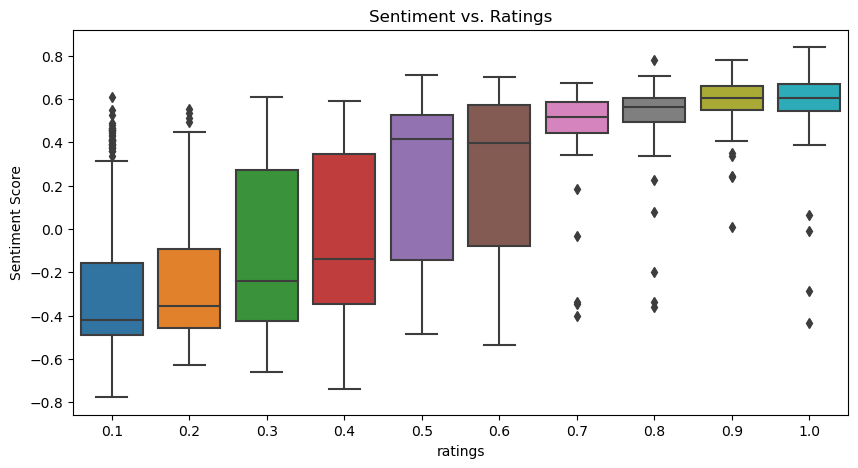

In [36]:
# Plot sentiment vs. rating
plt.figure(figsize=(10, 5))
sns.boxplot(x=tidy_df["ratings"], y=tidy_df["Combined_Sentiment"])
plt.title("Sentiment vs. Ratings")
plt.xlabel("ratings")
plt.ylabel("Sentiment Score")
plt.show()

The box plot shows a positive correlation between sentiment scores and ratings, where lower ratings have more negative sentiment scores and higher ratings have predominantly positive sentiment scores, with some variability and outliers.

In [37]:
duplicates = tidy_df[tidy_df.duplicated(subset=["Review"], keep=False)]# Finding duplicate reviews
print(duplicates.head())

Empty DataFrame
Columns: [Date, ratings, Title, Review, Sentiment, Sentiment_Label, TextBlob_Sentiment, TextBlob_Label, Combined_Sentiment, Final_Sentiment_Label]
Index: []


In [ ]:
!jupyter nbconvert British_Airline_Review_Slide.ipynb --to slides --post serve --no-input --no-prompt